![image.jpeg](PlayStore.jpeg)

## Analysis And Visualizations
**Remember the csv file you created in the last task ? Now it's time to use it for some analysis and visualizations**

**Note: each question will be answered into 2 parts first your analysis using pandas and then use visualizations to prove it**

### 11. Which app has the greatest number of reviews?

App with most reviews: Facebook
Number of reviews: 78158306


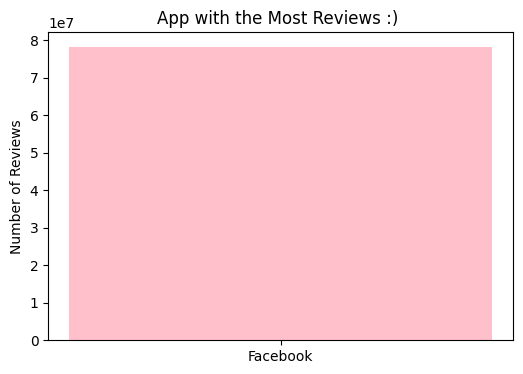

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('/content/filteredplaystore.csv')
df.to_csv('filteredplaystore.csv',index = False)
most_reviewed_app = df.loc[df['Reviews'].idxmax()] #the app with the highest number of reviews
print("App with most reviews:", most_reviewed_app['App'])
print("Number of reviews:", most_reviewed_app['Reviews'])
#bar chart for the most reviewed app
plt.figure(figsize=(6,4)) # Set figure size
plt.bar(most_reviewed_app['App'], most_reviewed_app['Reviews'], color='pink')
plt.title("App with the Most Reviews :) ")
plt.ylabel("Number of Reviews")
plt.show()


### 12. What Category Has the Highest Number of Apps Uploaded to the Store?

Get the specific category that contains the most significant number of uploaded applications.

Category with most apps:) Family
Number of apps in this category: 1870


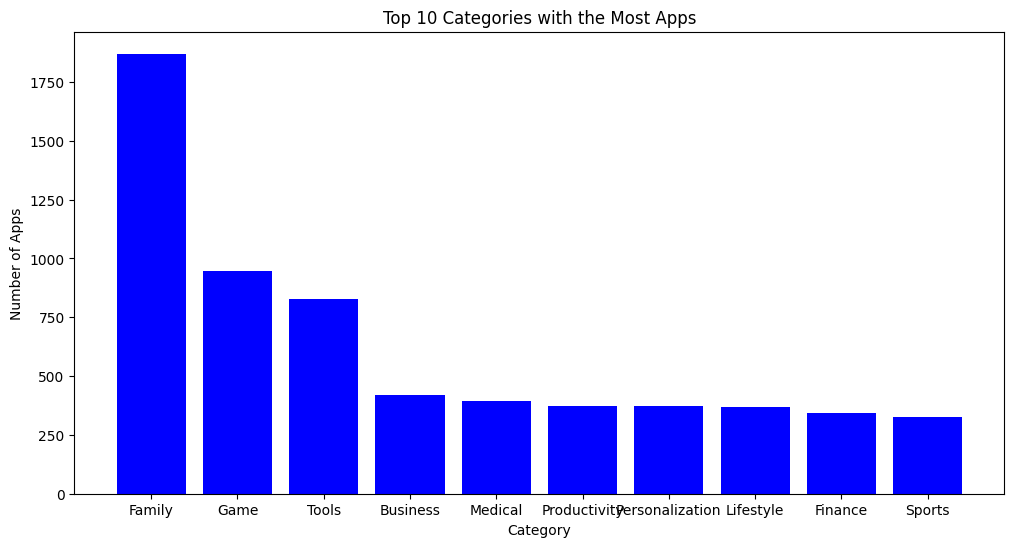

In [15]:
most_common_category = df['Category'].value_counts().idxmax()#category with the highest number of apps
num_apps_in_category = df['Category'].value_counts().max()
print("Category with most apps:)", most_common_category)
print("Number of apps in this category:", num_apps_in_category)
#bar chart for the top 10 categories with the most apps
top_categories = df['Category'].value_counts().head(10)
plt.figure(figsize=(12,6))
plt.bar(top_categories.index, top_categories.values, color='blue')
plt.title("Top 10 Categories with the Most Apps")
plt.xlabel("Category") # Label for the x-axis
plt.ylabel("Number of Apps")# Label for the y-axis
plt.show()

### 13. To Which Category Belongs the Most Expensive App?

Category of the most expensive app: Lifestyle


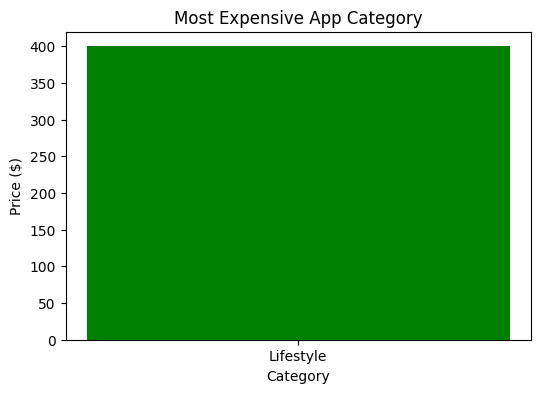

In [16]:
#app with the highest price
most_expensive_app = df.loc[df['Price'].idxmax()]
print("Category of the most expensive app:", most_expensive_app['Category'])
#Show the price of the most expensive app (barchart)
plt.figure(figsize=(6,4))
plt.bar(most_expensive_app['Category'], most_expensive_app['Price'], color='green')
plt.xlabel("Category")
plt.ylabel("Price ($)")
plt.title("Most Expensive App Category")
plt.show()

### 14. What's the Name of the Most Expensive Game?

Find the most expensive app in the Game category and enter its name.

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')
                                    App       Category    Rating  Reviews  \
0  "i DT" Fútbol. Todos Somos Técnicos.         Sports  4.191757       27   
1         +Download 4 Instagram Twitter         Social  4.500000    40467   
2            - Free Comics - Comic Apps         Comics  3.500000      115   
3                                    .R          Tools  4.500000      259   
4                                /u/app  Communication  4.700000      573   

       Size  Installs  Type  Price Content Rating         Genres  \
0   3774873       500  Paid    0.0       Everyone         Sports   
1  23068672   1000000  Paid    0.0       Everyone         Social   
2   9542041     10000  Paid    0.0     Mature 17+         Comics   
3    207872     10000  Paid    0.0       Everyone          Tools   
4 

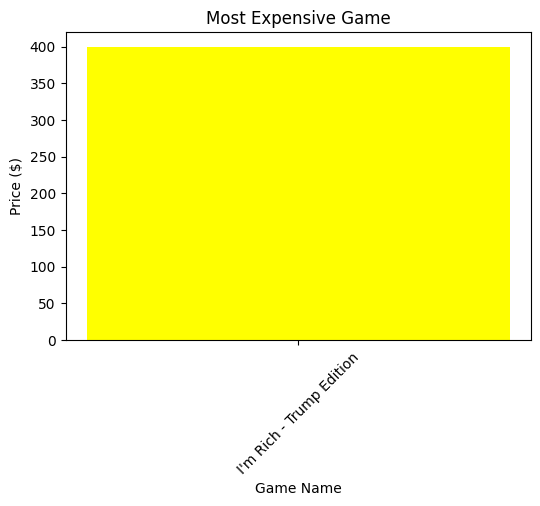

In [57]:
print(game_apps.columns)
print(game_apps.head())


# Convert the 'Price' column to numeric
game_apps['Price'] = pd.to_numeric(game_apps['Price'], errors='coerce')

# Drop rows where Price is NaN
game_apps = game_apps.dropna(subset=["Price"])

# Check if the DataFrame is empty after cleaning
if game_apps.empty:
    print("No games found with valid prices.")
else:

    most_expensive_game = game_apps.loc[game_apps['Price'].idxmax()]
    print("Most expensive game:", most_expensive_game["App"])

    plt.figure(figsize=(6, 4))
    plt.bar(most_expensive_game["App"], most_expensive_game["Price"], color='yellow')
    plt.xlabel("Game Name")
    plt.ylabel("Price ($)")
    plt.title("Most Expensive Game")
    plt.xticks(rotation=45)
    plt.show()

### 15. Which Is the Most Popular Finance App?

What app (from the Finance category) has the most installs?

                                    App       Category    Rating  Reviews  \
0  "i DT" Fútbol. Todos Somos Técnicos.         Sports  4.191757       27   
1         +Download 4 Instagram Twitter         Social  4.500000    40467   
2            - Free Comics - Comic Apps         Comics  3.500000      115   
3                                    .R          Tools  4.500000      259   
4                                /u/app  Communication  4.700000      573   

       Size  Installs  Type  Price Content Rating         Genres  \
0   3774873       500  Paid    0.0       Everyone         Sports   
1  23068672   1000000  Paid    0.0       Everyone         Social   
2   9542041     10000  Paid    0.0     Mature 17+         Comics   
3    207872     10000  Paid    0.0       Everyone          Tools   
4  55574528     10000  Paid    0.0     Mature 17+  Communication   

         Last Updated Current Ver Android Ver  
0     October 7, 2017        0.22  4.1 and up  
1      August 2, 2018        5.0

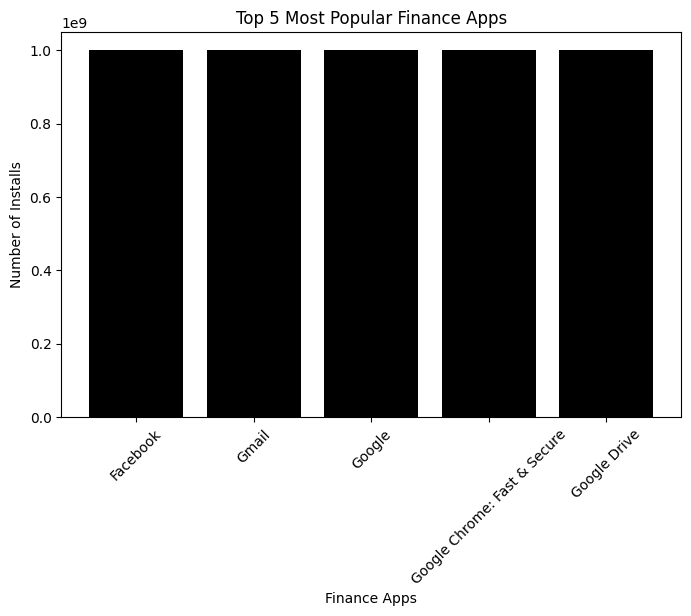

In [37]:

print(finance_apps.head())

finance_apps['Installs'] = finance_apps['Installs'].astype(str)

#  remove non-numeric characters and convert the column to integers
finance_apps['Installs'] = finance_apps['Installs'].str.replace('[+,]', '', regex=True).astype(int)

#  Find the most popular finance app (the one with the highest number of installs)
most_popular_finance_app = finance_apps.loc[finance_apps['Installs'].idxmax()]
print("Most popular finance app:", most_popular_finance_app['App'])

#  Find the top 5 finance apps (the ones with the highest number of installs)
top_finance_apps = finance_apps.nlargest(5, 'Installs')

#  Plot a bar chart for the top 5 finance apps
plt.figure(figsize=(8, 5))
plt.bar(top_finance_apps['App'], top_finance_apps['Installs'], color='black')
plt.xlabel("Finance Apps")
plt.ylabel("Number of Installs")
plt.title("Top 5 Most Popular Finance Apps")
plt.xticks(rotation=45)  # Rotate the app names on the X-axis for better readability
plt.show()

### 16. What Teen Game Has the Most Reviews?

What app from the Game category and catalogued as Teen in Content Rating has the most reviews?

Teen game with the most reviews: Asphalt 8: Airborne


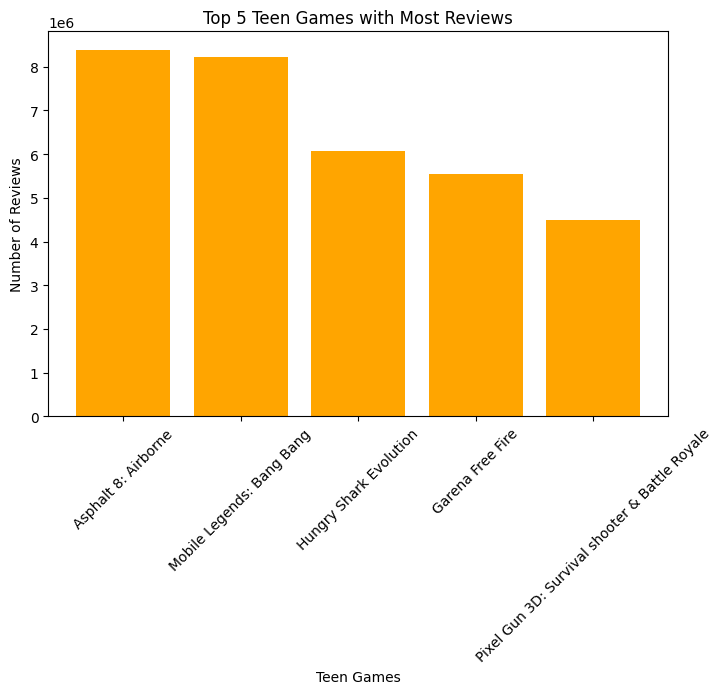

In [46]:
teen_games = games_data[(games_data['Category'] == 'Game') & (games_data['Content Rating'] == 'Teen')]

# Check if the filtered data is not empty
if teen_games.empty:
    print("No games found in the 'Game' category with 'Teen' content rating.")
else:
    # Find the game with the highest number of reviews
    most_reviewed_teen_game = teen_games.loc[teen_games['Reviews'].idxmax()]
    print("Teen game with the most reviews:", most_reviewed_teen_game['App'])

    top_teen_games = teen_games.nlargest(5, 'Reviews')

    # 6 Plot a bar chart
    plt.figure(figsize=(8, 5))
    plt.bar(top_teen_games['App'], top_teen_games['Reviews'], color='orange')
    plt.xlabel("Teen Games")
    plt.ylabel("Number of Reviews")
    plt.title("Top 5 Teen Games with Most Reviews")
    plt.xticks(rotation=45)
    plt.show()

### 17. Which Is the Free Game with the Most Reviews?

 Get the name of the free game app with the most reviews.

In [47]:

free_games = games_data[games_data['Type'] == 'Free']

#  Check if the filtered data is not empty
if free_games.empty:
    print("No free games found.")
else:
    # 4 Find the free game with the highest number of reviews
    most_reviewed_free_game = free_games.loc[free_games['Reviews'].idxmax()]
    print("Free game with the most reviews:", most_reviewed_free_game['App'])

    top_free_games = free_games.nlargest(5, 'Reviews')

    plt.figure(figsize=(8, 5))
    plt.bar(top_free_games['App'], top_free_games['Reviews'], color='green')
    plt.xlabel("Free Games")
    plt.ylabel("Number of Reviews")
    plt.title("Top 5 Free Games with Most Reviews")
    plt.xticks(rotation=45)
    plt.show()

No free games found.


### 18. How many Tb (tebibytes) were transferred (overall) for the most popular Lifestyle app?

This app produced the greatest amount of bytes transfer. Enter your answer in Tebibytes as a whole number (rounding down to the nearest integer). Example, if you find the total transfer to be 780.9581 Tb, just enter 780.

- Find the total size by multiplying size of the app with total installs and convert the result into TB.

                                    App       Category    Rating  Reviews  \
0  "i DT" Fútbol. Todos Somos Técnicos.         Sports  4.191757       27   
1         +Download 4 Instagram Twitter         Social  4.500000    40467   
2            - Free Comics - Comic Apps         Comics  3.500000      115   
3                                    .R          Tools  4.500000      259   
4                                /u/app  Communication  4.700000      573   

       Size  Installs  Type  Price Content Rating         Genres  \
0   3774873       500  Paid    0.0       Everyone         Sports   
1  23068672   1000000  Paid    0.0       Everyone         Social   
2   9542041     10000  Paid    0.0     Mature 17+         Comics   
3    207872     10000  Paid    0.0       Everyone          Tools   
4  55574528     10000  Paid    0.0     Mature 17+  Communication   

         Last Updated Current Ver Android Ver  
0     October 7, 2017        0.22  4.1 and up  
1      August 2, 2018        5.0

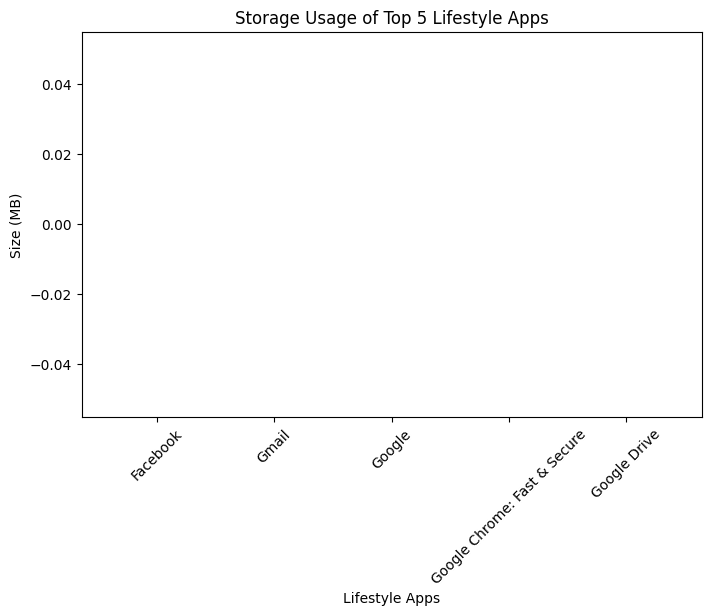

In [54]:
print(lifestyle_apps.head())
print(lifestyle_apps['Size'].dtype)  #
# Convert the 'Size' column to string (if it's not already)
lifestyle_apps['Size'] = lifestyle_apps['Size'].astype(str)

most_popular_lifestyle_app = lifestyle_apps.loc[lifestyle_apps['Installs'].idxmax()]

#  Convert size from MB/GB to bytes
size_str = most_popular_lifestyle_app['Size']  # Get the size column as string

# Convert size to bytes
if 'M' in size_str:
    size_bytes = float(size_str.replace('M', '')) * 1e6
elif 'G' in size_str:
    size_bytes = float(size_str.replace('G', '')) * 1e9

    size_bytes = float(size_str)  # Assume the size is already in bytes

total_bytes = size_bytes * most_popular_lifestyle_app['Installs']

# Convert bytes to Tebibytes (1 TiB = 2^40 bytes)
total_tb = total_bytes / (2 ** 40)

total_tb_int = int(total_tb)

print("Total TB transferred:", total_tb_int)

top_lifestyle_apps = lifestyle_apps.nlargest(5, 'Installs')

# Convert sizes for visualization
sizes_in_mb = np.array([float(s.replace('M', '')) if 'M' in s else float(s.replace('G', '')) * 1024
    if 'G' in s else float(s) / 1e6 for s in top_lifestyle_apps['Size']])

plt.figure(figsize=(8, 5))
plt.bar(top_lifestyle_apps['App'], sizes_in_mb, color='purple')
plt.xlabel("Lifestyle Apps")
plt.ylabel("Size (MB)")
plt.title("Storage Usage of Top 5 Lifestyle Apps")
plt.xticks(rotation=45)
plt.show()